<h1 style="text-align: center;">Deep Learning<br
><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
# Importing our libraries
#------------------------------------------------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay,roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score
import pickle
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input,Dense, Activation, Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping
import os
import random
plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [ ]:
# Checking whether the GPU is supported in the session
#------------------------------------------------------------------------------------------------------

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [ ]:
# Setting the seed to be the same in every type of configuration to get the same results always
#------------------------------------------------------------------------------------------------------

SEED = 42
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
# Importing the dataset and setting our x_train,x_test,y_train, and y_test values
#------------------------------------------------------------------------------------------------------

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Cheching the shapes of our training and testing splits
#------------------------------------------------------------------------------------------------------

print("x_train shape: ",x_train.shape,"\nx_test shape: ",x_test.shape,"\ny_train shape: ",y_train.shape,"\ny_test shape: ",y_test.shape )

x_train shape:  (60000, 28, 28) 
x_test shape:  (10000, 28, 28) 
y_train shape:  (60000,) 
y_test shape:  (10000,)


In [ ]:
# Creating our validation set using our training set
#------------------------------------------------------------------------------------------------------

x_train , x_valid, y_train,y_valid =  train_test_split(
    x_train, y_train, stratify=y_train, test_size=0.10, random_state=42
)

In [ ]:
# Cheching the shapes of our training split (after splitting again) and validation split
#------------------------------------------------------------------------------------------------------

print("x_train shape: ",x_train.shape,"\nx_valid shape: ",x_valid.shape,"\ny_train shape: ",y_train.shape,"\ny_valid shape: ",y_valid.shape )

x_train shape:  (54000, 28, 28) 
x_valid shape:  (6000, 28, 28) 
y_train shape:  (54000,) 
y_valid shape:  (6000,)


In [ ]:
# Cheching the number of images in each split
#------------------------------------------------------------------------------------------------------

print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_valid)} images in the validation dataset")
print(f"There are {len(x_test)} images in the test dataset")

There are 54000 images in the training dataset
There are 6000 images in the validation dataset
There are 10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
# Cheching the classes and their indices
#------------------------------------------------------------------------------------------------------

# 0	    T-shirt/top
# 1	    Trouser
# 2	    Pullover
# 3	    Dress
# 4	    Coat
# 5	    Sandal
# 6	    Shirt
# 7	    Sneaker
# 8	    Bag
# 9	    Ankle boot

classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

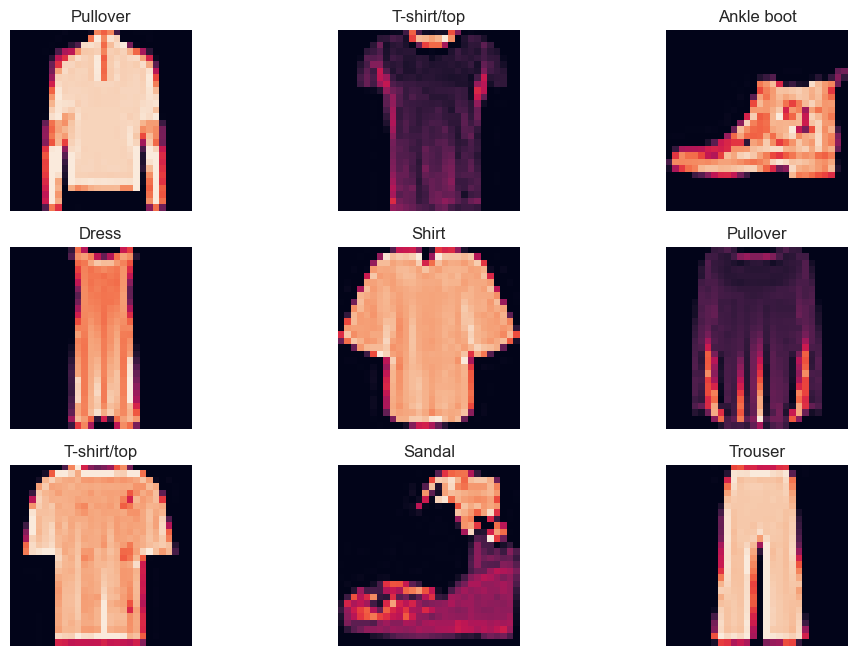

In [ ]:
# Here are 9 random samples of the images and their labels
#------------------------------------------------------------------------------------------------------
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(12, 8)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(x_train[rand_index])
plt.show()

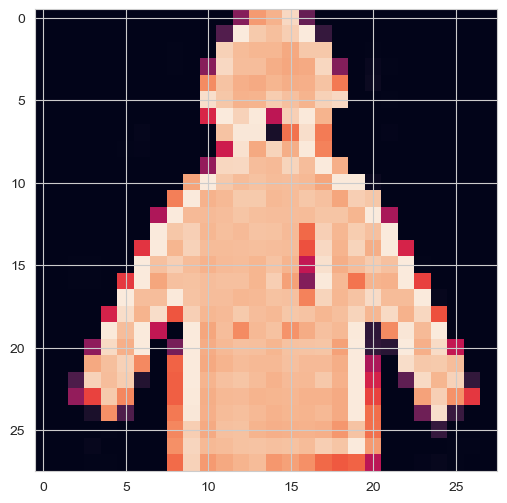

In [ ]:
# Showing a single random sample
#------------------------------------------------------------------------------------------------------
plt.imshow(x_train[3321])
plt.show()

In [ ]:
# Checking its class, 4 represents the coats
#------------------------------------------------------------------------------------------------------
y_train[3321]

4

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
# The maximum value and the minimum value BEFORE normalizing the splits
#------------------------------------------------------------------------------------------------------

print(" \nTrain Split \n\n The value of the min = " ,x_train[3].min(), "\n The value of the max = " ,x_train[3].max(),"\n\n")
print(" Validation Split \n\n The value of the min = " ,x_valid[3].min(), "\n The value of the max = " ,x_valid[3].max(),"\n\n")
print(" Test Split \n\n The value of the min = " ,x_test[3].min(), "\n The value of the max = " ,x_test[3].max(),"\n")

 
Train Split 

 The value of the min =  0 
 The value of the max =  255 


 Validation Split 

 The value of the min =  0 
 The value of the max =  255 


 Test Split 

 The value of the min =  0 
 The value of the max =  255 



In [ ]:
# Normalizing the data split to change their value ranges from (0,255) to (0,1)
#------------------------------------------------------------------------------------------------------
x_train =x_train.astype("float32")
x_valid = x_valid.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_valid /=255
x_test /= 255

In [ ]:
# The maximum value and the minimum value AFTER normalizing the splits
#------------------------------------------------------------------------------------------------------

print(" \nTrain Split \n\n The value of the min = " ,x_train[3].min(), "\n The value of the max = " ,x_train[3].max(),"\n\n")
print(" Validation Split \n\n The value of the min = " ,x_valid[3].min(), "\n The value of the max = " ,x_valid[3].max(),"\n\n")
print(" Test Split \n\n The value of the min = " ,x_test[3].min(), "\n The value of the max = " ,x_test[3].max(),"\n")

 
Train Split 

 The value of the min =  0.0 
 The value of the max =  1.0 


 Validation Split 

 The value of the min =  0.0 
 The value of the max =  1.0 


 Test Split 

 The value of the min =  0.0 
 The value of the max =  1.0 



**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
print("Shapes BEFORE reshaping: \n\nx_train:",x_train.shape, "\nx_valid:",x_valid.shape,"\nx_test: ",x_test.shape)

Shapes BEFORE reshaping: 

x_train: (54000, 28, 28) 
x_valid: (6000, 28, 28) 
x_test:  (10000, 28, 28)


In [ ]:
# Expanding the dimensions to include the channel ( since we are working on grayscale images, then the newer dimension's value
# is 1 because we only take the intensity of the pixel and it is a single value unlike in RGB color space)
#------------------------------------------------------------------------------------------------------

x_train = np.expand_dims(x_train, 3)
x_valid = np.expand_dims(x_valid, 3)
x_test = np.expand_dims(x_test, 3)

In [ ]:
print("Shapes AFTER reshaping: \n\nx_train:",x_train.shape, "\nx_valid:",x_valid.shape,"\nx_test: ",x_test.shape)

Shapes AFTER reshaping: 

x_train: (54000, 28, 28, 1) 
x_valid: (6000, 28, 28, 1) 
x_test:  (10000, 28, 28, 1)


**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
print("Shapes BFFORE encoding: \n\ny_train:",y_train.shape, "\ny_valid:",y_valid.shape,"\ny_test: ",y_test.shape)

Shapes BFFORE encoding: 

y_train: (54000,) 
y_valid: (6000,) 
y_test:  (10000,)


In [ ]:
# Encoding the Ys so we can represent the classes since we have 10 different classes
#------------------------------------------------------------------------------------------------------

Y_train = to_categorical(y_train, 10)
Y_valid = to_categorical(y_valid, 10)
Y_test = to_categorical(y_test, 10)

In [ ]:
print("Shapes AFTER encoding: \n\ny_train:",Y_train.shape, "\ny_valid:",Y_valid.shape,"\ny_test: ",Y_test.shape)

Shapes AFTER encoding: 

y_train: (54000, 10) 
y_valid: (6000, 10) 
y_test:  (10000, 10)


# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
# Now let's create our MODEL!
# First we start by choosing our layers, I used the layers suggested, but added dropout to avoid overfitting
#------------------------------------------------------------------------------------------------------

model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3, 3),input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2)) #   <<-------------------Dropout added here :)
model.add(Dense(10, activation="softmax"))

# Compiled the model with the same requested parameters
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
# Checking the model's summary to see the layers, output shape, and no. parameters
#------------------------------------------------------------------------------------------------------
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [ ]:
# Setting the early stopping configurations monitoring the val_loss and setting the patience to 15
#------------------------------------------------------------------------------------------------------

early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [ ]:
# Fitting the model using the validation split we created earlier and having the batch size = 64 and epochs = 40
#------------------------------------------------------------------------------------------------------

model.fit(
    x_train,
    Y_train,
    batch_size=64,
    epochs=40,
    validation_data=(x_valid, Y_valid),
    callbacks=[early_stop],
)

Epoch 1/40
844/844 [==============================] - 4s 5ms/step - loss: 0.4666 - accuracy: 0.8336 - val_loss: 0.2997 - val_accuracy: 0.8898
Epoch 2/40
844/844 [==============================] - 4s 4ms/step - loss: 0.3022 - accuracy: 0.8934 - val_loss: 0.2618 - val_accuracy: 0.9057
Epoch 3/40
844/844 [==============================] - 4s 4ms/step - loss: 0.2606 - accuracy: 0.9068 - val_loss: 0.2474 - val_accuracy: 0.9072
Epoch 4/40
844/844 [==============================] - 4s 4ms/step - loss: 0.2351 - accuracy: 0.9146 - val_loss: 0.2418 - val_accuracy: 0.9143
Epoch 5/40
844/844 [==============================] - 4s 4ms/step - loss: 0.2152 - accuracy: 0.9237 - val_loss: 0.2567 - val_accuracy: 0.9100
Epoch 6/40
844/844 [==============================] - 4s 5ms/step - loss: 0.2014 - accuracy: 0.9283 - val_loss: 0.2668 - val_accuracy: 0.9080
Epoch 7/40
844/844 [==============================] - 4s 5ms/step - loss: 0.1897 - accuracy: 0.9312 - val_loss: 0.2342 - val_accuracy: 0.9207
Epoch 

**TASK 7: Plot values of metrics you used in your model.**

In [ ]:
# Checking the model's metrics
#------------------------------------------------------------------------------------------------------
model.metrics_names

['loss', 'accuracy']

In [ ]:
# Checking the summary of training (showing the different values of loss, accuracy, validation loss, and validation accuracy)
#------------------------------------------------------------------------------------------------------

summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.467,0.834,0.300,0.890
1,0.302,0.893,0.262,0.906
2,0.261,0.907,0.247,0.907
3,0.235,0.915,0.242,0.914
4,0.215,0.924,0.257,0.910


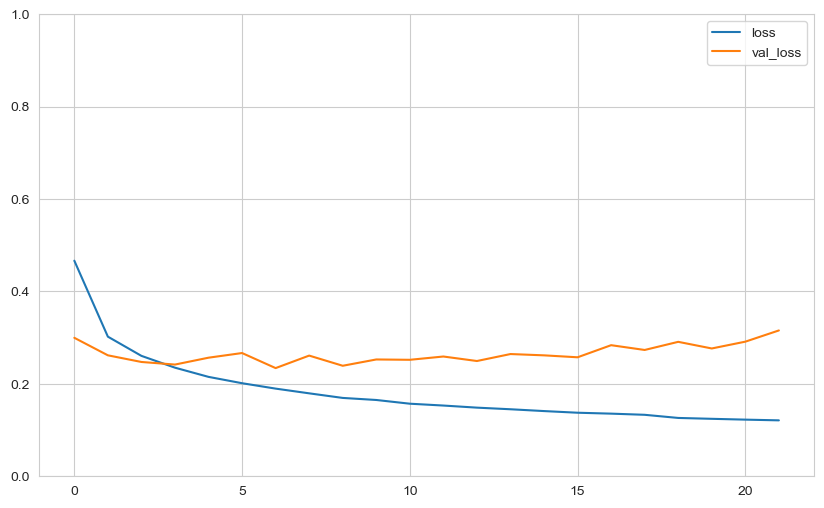

In [ ]:
# Plotting the summary of training (showing the different values of the loss and the validation loss)
# The model doesn't seem to be overfitting nor underfitting
#------------------------------------------------------------------------------------------------------

summary[["loss", "val_loss"]].plot()
plt.ylim([0, 1])
plt.show()

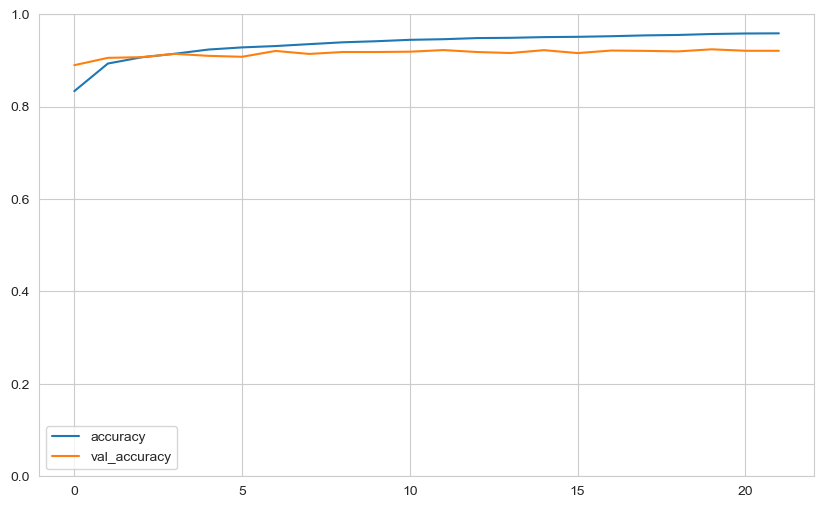

In [ ]:
# Plotting the summary of training (showing the different values of the accuracy and the validation accuracy)
# The model doesn't seem to be overfitting nor underfitting
#------------------------------------------------------------------------------------------------------

summary[["accuracy", "val_accuracy"]].plot()
plt.ylim([0, 1])
plt.show()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
# Evaluating our model using the test split
#------------------------------------------------------------------------------------------------------
model.evaluate(x_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.9120


[0.26385432481765747, 0.9120000004768372]

In [ ]:
score = model.evaluate(x_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.26385432481765747
Test accuracy: 0.9120000004768372


In [ ]:
pred_prob = model.predict(x_test)
pred_prob

array([[6.0591788e-07, 6.5367461e-10, 6.5629997e-08, ..., 1.5580944e-04,
        1.1279238e-06, 9.9959320e-01],
       [9.7953659e-08, 2.6510125e-21, 9.9999964e-01, ..., 9.6627630e-15,
        1.5317143e-11, 7.2807369e-13],
       [5.9704397e-09, 1.0000000e+00, 1.1495868e-11, ..., 2.4658132e-14,
        7.8680673e-12, 6.2968700e-13],
       ...,
       [3.7202906e-08, 2.6374917e-16, 6.1671406e-09, ..., 3.1811499e-08,
        9.9999547e-01, 2.2206479e-12],
       [1.8710557e-08, 9.9999821e-01, 4.1348462e-09, ..., 3.2677910e-12,
        1.8550773e-10, 7.6816059e-10],
       [1.9110154e-04, 4.9179694e-06, 1.4511485e-03, ..., 5.4375555e-02,
        5.7357592e-03, 3.4064918e-03]], dtype=float32)

In [ ]:
pred_prob.shape

(10000, 10)

In [ ]:
pred_prob[0]

array([6.0591788e-07, 6.5367461e-10, 6.5629997e-08, 3.2411080e-09,
       1.6934193e-08, 2.4920228e-04, 8.4565528e-09, 1.5580944e-04,
       1.1279238e-06, 9.9959320e-01], dtype=float32)

In [ ]:
np.argmax(pred_prob[0])

9

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [ ]:
y_pred.shape

(10000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
# Getting our classification report
# We can see that we have different precision,recall, and F1 score values for each class
# The model seems to be doing well for almost all of the classes except class 6 which seems to be a bit confusing to the model
#------------------------------------------------------------------------------------------------------

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.84      0.86      1000
           3       0.92      0.91      0.92      1000
           4       0.80      0.91      0.86      1000
           5       0.96      0.98      0.97      1000
           6       0.80      0.70      0.75      1000
           7       0.96      0.95      0.96      1000
           8       0.98      0.99      0.99      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[893   0  14  10   6   3  67   0   7   0]
 [  1 971   1  18   5   0   3   0   1   0]
 [ 14   0 845   9  87   0  45   0   0   0]
 [ 14   4   9 910  37   2  24   0   0   0]
 [  1   1  36  15 914   1  31   0   1   0]
 [  0   0   0   0   0 985   0   9   0   6]
 [122   0  65  25  85   0 697   0   6   0]
 [  0   0   0   0   0  18   0 954   1  27]
 [  1   1   2   2   2   2   2   1 987   0]
 [  0   0   0   0   0  10   0  25   1 964]]


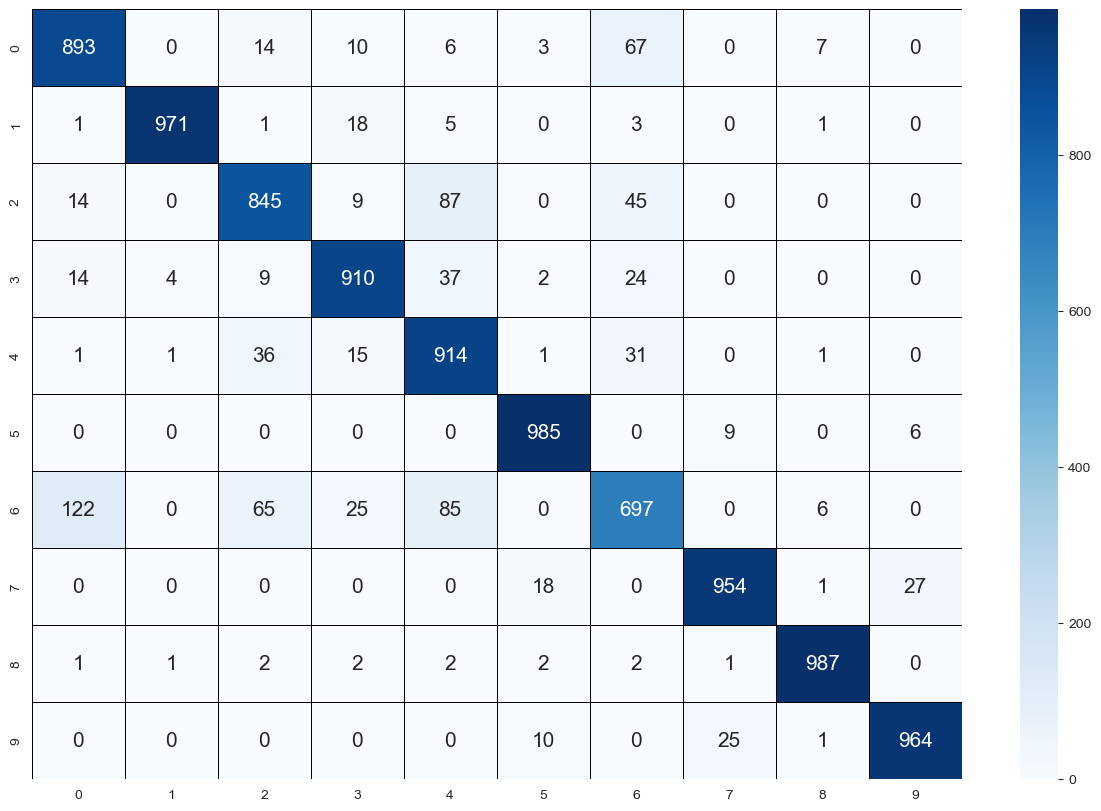

In [ ]:
# Let's take a look at our heat map here
# we can see that the number of correctly classified images
# As the heat map shows, both classes 2 and 6 seem to have more incorrectly classified images
# It seems like the model is slightly confusing between class 2 [pullover] and class 6 [shirt] which seems reasonable
#------------------------------------------------------------------------------------------------------

plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},)
plt.show()

In [ ]:
# No. incorrectly classified images
#------------------------------------------------------------------------------------------------------

np.not_equal(y_test, y_pred).sum()

880

In [ ]:
# No. correctly classified images
#------------------------------------------------------------------------------------------------------

np.equal(y_test, y_pred).sum()

9120

Text(0.5, 1.0, 'Bar graph')

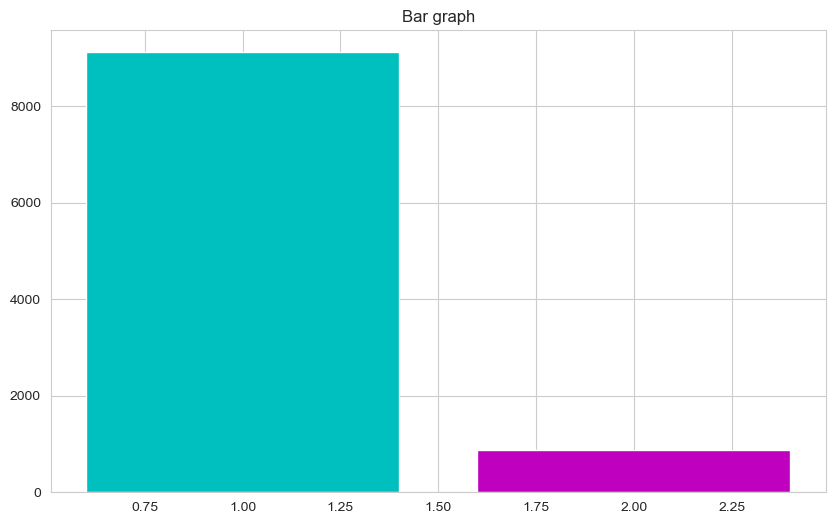

In [ ]:
# Let's do some comparison
# The number of incorrectly classified images isn't as much which means our model is doing a good job :)
#------------------------------------------------------------------------------------------------------

plt.bar(1,np.equal(y_test, y_pred).sum(),color = 'c', align = 'center')
plt.bar( 2 ,np.not_equal(y_test, y_pred).sum(),color = 'm', align = 'center')
plt.title('Bar graph')


## Prediction

In [ ]:
# Now let's predict a single image
#------------------------------------------------------------------------------------------------------
Cloth_Pred = x_test[3]

In [ ]:
Cloth_Pred.shape

(28, 28, 1)

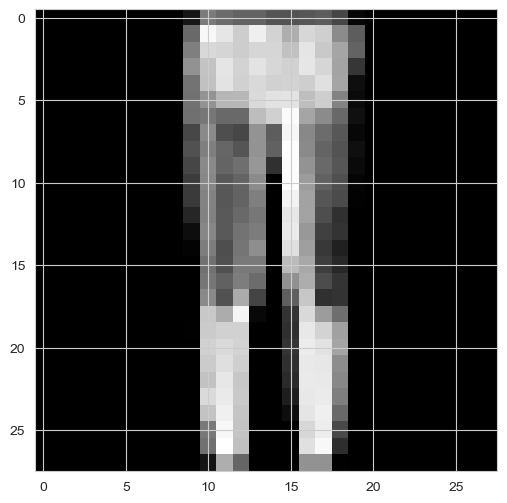

In [ ]:
plt.imshow(Cloth_Pred, cmap="gray")
plt.show()

In [ ]:
np.expand_dims(Cloth_Pred, 0).shape

(1, 28, 28, 1)

In [ ]:
pred_prob = model.predict(np.expand_dims(Cloth_Pred, 0))
pred_prob

array([[3.5636219e-10, 1.0000000e+00, 1.0885356e-11, 7.8712761e-09,
        1.7258938e-09, 4.2009011e-11, 2.9347663e-11, 5.8932495e-15,
        1.9540680e-13, 4.9244783e-13]], dtype=float32)

In [ ]:
# Indeed 1 is trouser
# Remember the classes?
# 0	    T-shirt/top
# 1	    Trouser
# 2	    Pullover
# 3	    Dress
# 4	    Coat
# 5	    Sandal
# 6	    Shirt
# 7	    Sneaker
# 8	    Bag
# 9	    Ankle boot
#------------------------------------------------------------------------------------------------------
y_pred = np.argmax(pred_prob)
y_pred

1

# End
